# Phishing Website Detection
### Jenna, Kiet, Axel
##### https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset

## Outline on what to do:
#### Data preparation:

>
> 1. Normalize the data: Apply scaling/normalization to the features, as neural networks typically work better with standardized input data
>
> 2. Split the data: Split the dataset into training, validation, and test sets (e.g., 70% for training, 15% for validation, and 15% for testing)

#### Model design:
> Choose the architecture: Design an appropriate neural network architecture
>
> 1. Determine the size: Select the number of layers and neurons per layer in your network
>
> 2. Choose the activation functions: Select suitable activation functions for the hidden layers (e.g., ReLU) and the output layer (e.g., sigmoid for binary classification)
>
> 3. Set the loss function: Choose a loss function that fits your problem (e.g., binary cross-entropy for binary classification)
>
> 4. Set the optimizer: Choose an optimization algorithm (e.g., Adam, SGD) and set its parameters (e.g., learning rate, momentum)

#### Model training:
> 1. Train the model: Fit the model to the training data, using the validation data to fine-tune and monitor the model's performance during training
>
> 2. Regularization: Apply techniques to prevent overfitting, such as dropout or L1/L2 regularization
>
> 3. Early stopping: Implement an early stopping mechanism to halt training when validation loss stops improving
>
> 4. Save the model: Save the trained model for future use and evaluation

#### Model evaluation:
>
> 1. Evaluate the model: Assess the model's performance using the test set
>
> 2. Confusion matrix: Calculate a confusion matrix to analyze the true positives, true negatives, false positives, and false negatives
>
> 3. Performance metrics: Calculate classification performance metrics, such as precision, recall, F1-score, and accuracy.

#### Model fine-tuning (if needed):
>
> 1. Hyperparameter tuning: Optimize the hyperparameters (e.g., learning rate, number of layers, neurons per layer) to improve the model's performance
>
> 2. Feature engineering: Experiment with different combinations of features or create new features to enhance the model's performance
>
> 3. Model architecture: Test different neural network architectures to determine which one works best for your problem

In [2]:
import pandas as pd

df = pd.read_csv("dataset_phishing.csv")
copy = df.copy()
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
#encoding non-numeric features

encoding1 = {'legitimate': 1, 'phishing': 0}
df['status'] = df['status'].replace(encoding1)

#remove url from df

df = df.drop('url', axis = 1)

df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,1
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,0
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,0
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,1
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,1


In [4]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,0.500000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,1.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000,1.000000


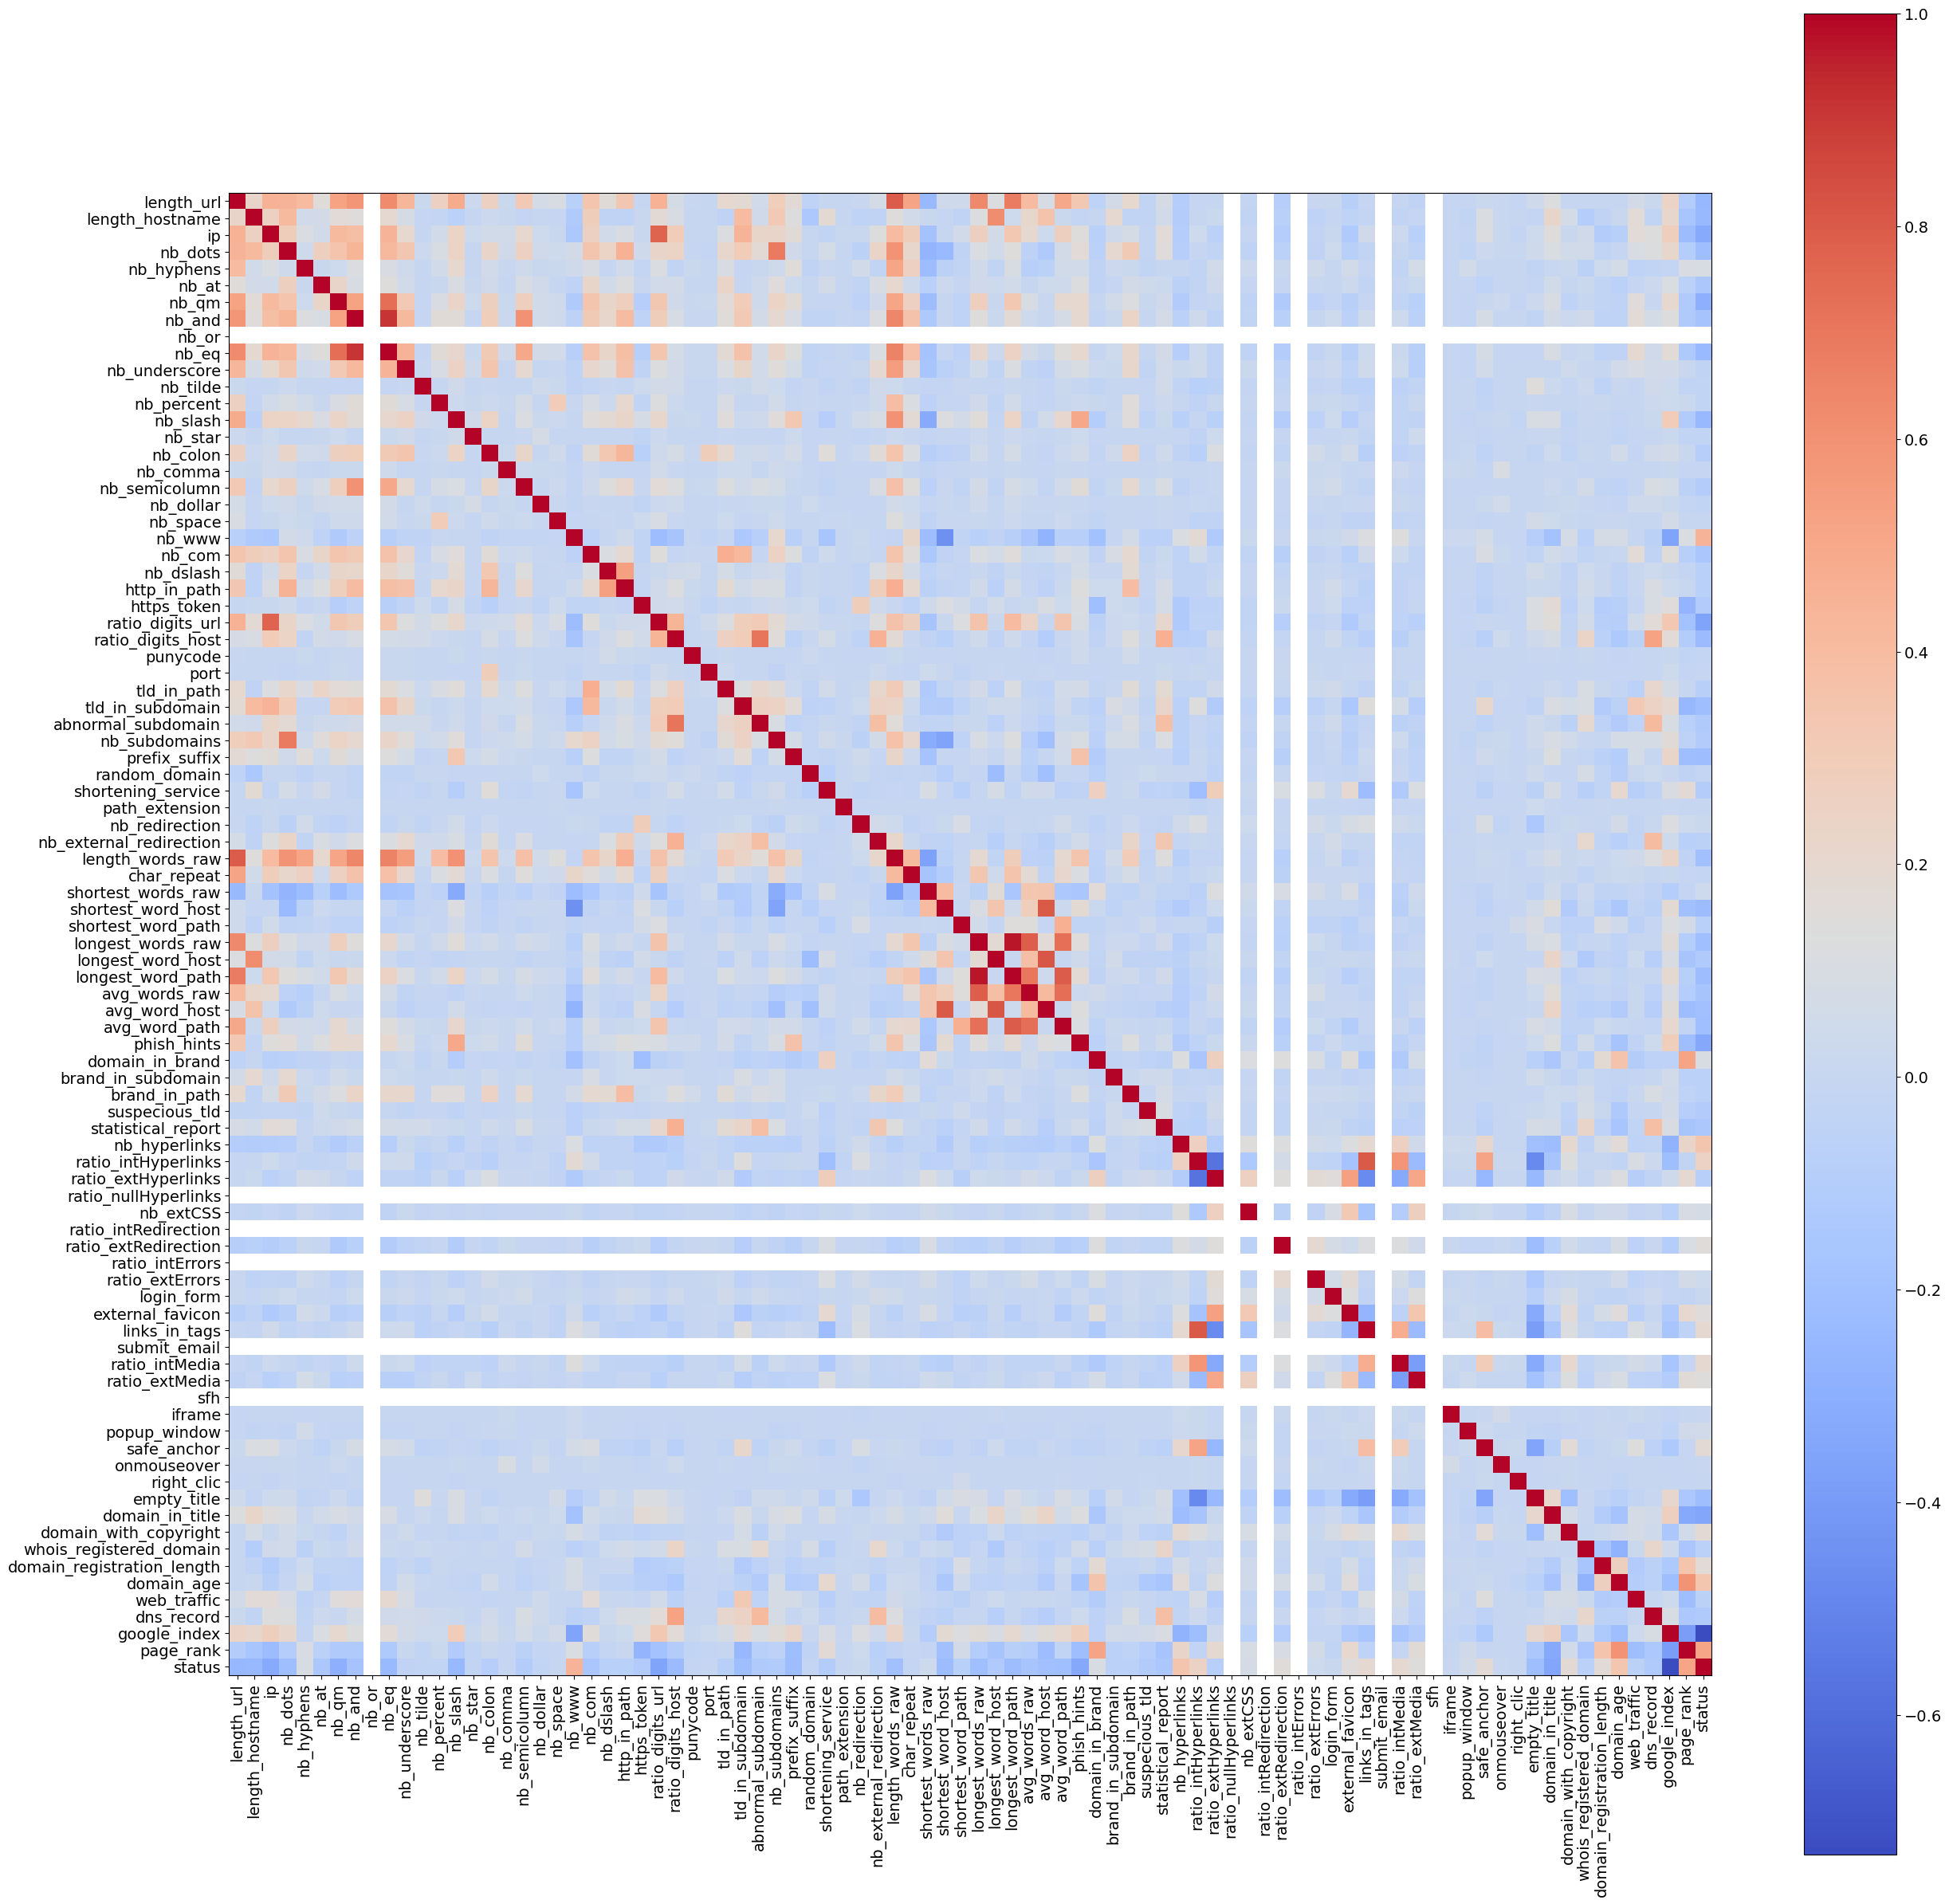

In [5]:
# Kiet - I made correlation matrix using a heatmap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(30, 30))
heatmap = ax.imshow(corr_matrix, cmap='coolwarm')

# Set up the tick labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90, fontsize=14)
ax.set_yticklabels(corr_matrix.columns, fontsize=14)

# Add the colorbar
cbar = plt.colorbar(heatmap)
cbar.ax.tick_params(labelsize=14)

plt.show()

In [6]:
#separate into training and testing sets

from sklearn.model_selection import train_test_split

X, y = df.drop('status', axis = 1).to_numpy(), df['status'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
#logistic regression

from sklearn.linear_model import LogisticRegression

logisticReg = LogisticRegression(max_iter = 300, random_state = 0)
logisticReg.fit(X_train, y_train)
y_pred0 = logisticReg.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy Score:", accuracy_score(y_test, y_pred0))
print("Classification Report:\n", classification_report(y_test, y_pred0))

Accuracy Score: 0.7865266841644795
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78      1140
           1       0.77      0.82      0.79      1146

    accuracy                           0.79      2286
   macro avg       0.79      0.79      0.79      2286
weighted avg       0.79      0.79      0.79      2286



In [28]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

RF1 = RandomForestClassifier(n_estimators=10, random_state=0)
RF1.fit(X_train, y_train)
y_pred1 = RF1.predict(X_test)

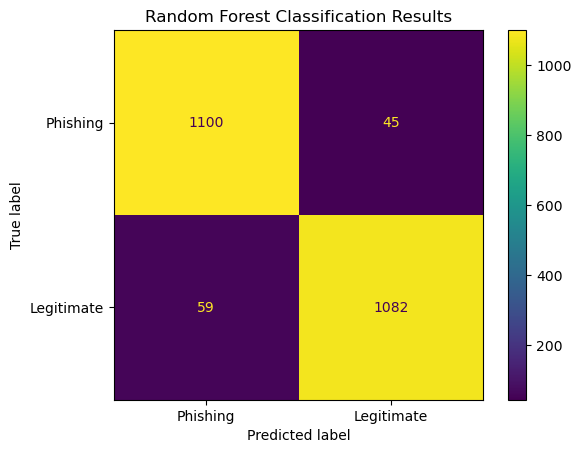

In [30]:
#making confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm1 = confusion_matrix(y_test, y_pred1, labels=RF1.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=["Phishing", "Legitimate"])
disp1.plot()
plt.title("Random Forest Classification Results")
plt.show()

In [31]:
#insert here the accuracy evaluation methods we did in class, something about using fractions and the TP, FP, etc values

TP, TN, FP, FN = 0, 0, 0, 0

for i in range(0, len(y_test)):
    if (y_test[i] == 1 and y_pred1[i] == 1):
        TP += 1
    elif (y_test[i] == 0 and y_pred1[i] == 0):
        TN += 1
    elif (y_test[i] == 1 and y_pred1[i] == 0):
        FN += 1
    else:
        FP += 1

In [32]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy Score:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))

Accuracy Score: 0.9545056867891514
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1145
           1       0.96      0.95      0.95      1141

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



In [33]:
#find most important features using the sklearn model feature importance property

from sklearn.ensemble import RandomForestClassifier
import numpy as np

RF2 = RandomForestClassifier(n_estimators=10, random_state=0)

importance = None
mask = None
 
RF2.fit(X_train, y_train)
importance = RF2.feature_importances_

median = np.median(importance)
mask = importance > median
    
print(mask)

[ True  True  True  True  True False False  True False  True False False
 False  True False False False False False False  True False False False
 False  True  True False False False False False  True False False False
 False  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False  True  True  True False
  True False  True False  True False False  True False False  True False
 False False  True False False  True  True  True False  True  True  True
 False  True  True]


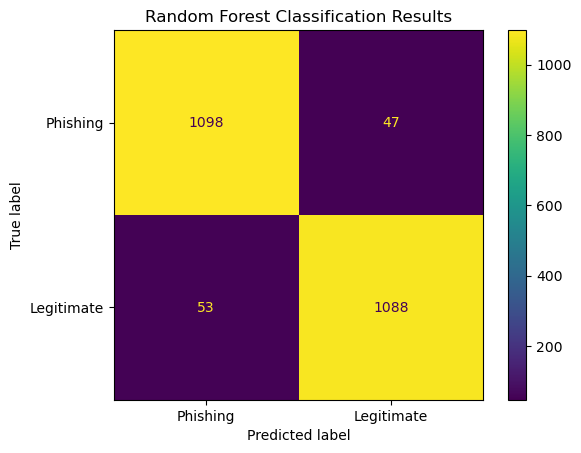

In [35]:
#recalculate predictions using a random forest classifier

X_train_selected = X_train[:,mask]
X_test_selected = X_test[:,mask]

RF3 = RandomForestClassifier(n_estimators=10, random_state=0)
RF3.fit(X_train_selected, y_train)

y_pred3 = RF3.predict(X_test_selected)

cm3 = confusion_matrix(y_test, y_pred3, labels=RF3.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=["Phishing", "Legitimate"])
disp3.plot()
plt.title("Random Forest Classification Results")
plt.show()

In [36]:
#recalculate model evaluation measures

print("Accuracy Score:", accuracy_score(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))

Accuracy Score: 0.9562554680664916
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1145
           1       0.96      0.95      0.96      1141

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



> **Below is Kiet testing different things to see if it works**

In [8]:
# Normalizing data
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select the features (excluding 'status' and 'URL')
feature_columns = [col for col in df.columns if col not in ['status', 'URL']]
X = df[feature_columns]

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Replace the original features with the scaled features
df[feature_columns] = X_scaled

In [9]:
# Spliting the data
y = df['status']

# Split the data into a 70% training set, 15% validation set, and 15% test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [10]:
# Testing feedforward network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

# Define the model architecture
model = Sequential([
    # Input layer
    Dense(256, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    # Hidden layers
    Dense(128),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    Dense(64),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

2023-04-26 15:34:38.072170: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               22528     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8

2023-04-26 15:34:42.692572: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
126/126 [==============================] - 1s 3ms/step - loss: 0.2420 - accuracy: 0.9045 - val_loss: 0.1303 - val_accuracy: 0.9568
Epoch 2/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1497 - accuracy: 0.9460 - val_loss: 0.1284 - val_accuracy: 0.9580
Epoch 3/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9554 - val_loss: 0.1304 - val_accuracy: 0.9562
Epoch 4/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9608 - val_loss: 0.1184 - val_accuracy: 0.9609
Epoch 5/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9630 - val_loss: 0.1109 - val_accuracy: 0.9662
Epoch 6/50
126/126 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9670 - val_loss: 0.1100 - val_accuracy: 0.9650
Epoch 7/50
126/126 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.9671 - val_loss: 0.1101 - val_accuracy: 0.9656
Epoch 

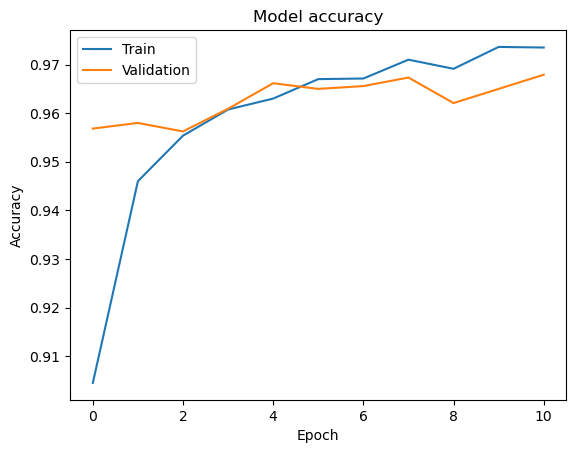

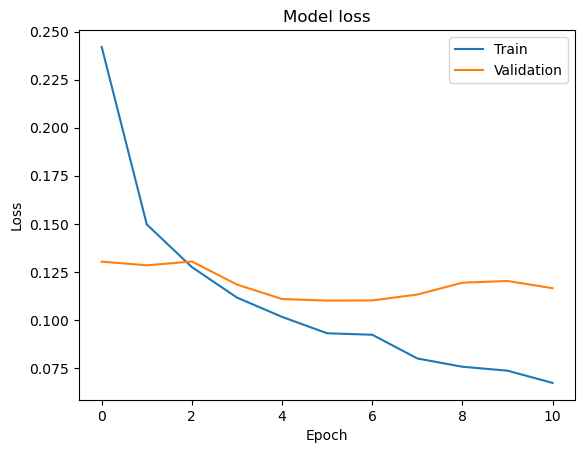

In [11]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

# Visualize training progress
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


>
> **Commenting on the graph:** Both graphs stop at epoch 12, it means that the training process stopped early due to the EarlyStopping callback. EarlyStopping is a regularization technique used to prevent overfitting during the training process.
>
> The fact that the training stopped at epoch 12 indicates that the validation loss stopped improving after 7 epochs and continued to stagnate or degrade for the next 5 epochs. Once the 5-epoch patience threshold was reached, the training stopped, and the model's weights were restored to the best performing iteration (as specified by restore_best_weights=True).


In [12]:
# Evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the validation set
y_val_pred = (model.predict(X_val) > 0.5).astype("int32")

# Print the classification report and confusion matrix
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Accuracy Score:", accuracy_score(y_val, y_val_pred))

54/54 [==============================] - 0s 934us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       857
           1       0.97      0.96      0.96       857

    accuracy                           0.96      1714
   macro avg       0.97      0.96      0.96      1714
weighted avg       0.97      0.96      0.96      1714

Confusion Matrix:
 [[829  28]
 [ 32 825]]
Accuracy Score: 0.9649941656942824


In [19]:
model.evaluate(X_test, y_test)

54/54 [==============================] - 0s 1ms/step - loss: 0.1367 - accuracy: 0.9539


[0.13673751056194305, 0.9539358615875244]

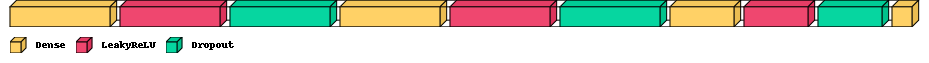

In [59]:
import visualkeras
visualkeras.layered_view(model, scale_z=1, max_z=100, legend=True)

>
> **Let's try using a different model!**

In [13]:
# Trying random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = rf_classifier.predict(X_val)

# Calculate and print the accuracy score, classification report, and confusion matrix
print("Accuracy Score:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Accuracy Score: 0.9684947491248541
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       857
           1       0.97      0.96      0.97       857

    accuracy                           0.97      1714
   macro avg       0.97      0.97      0.97      1714
weighted avg       0.97      0.97      0.97      1714

Confusion Matrix:
 [[835  22]
 [ 32 825]]


54/54 [==============================] - 0s 1ms/step


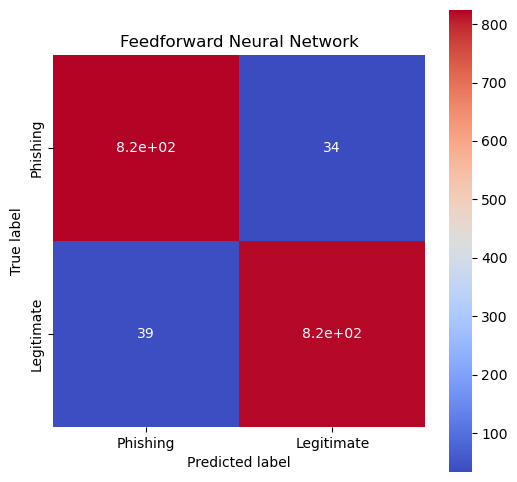

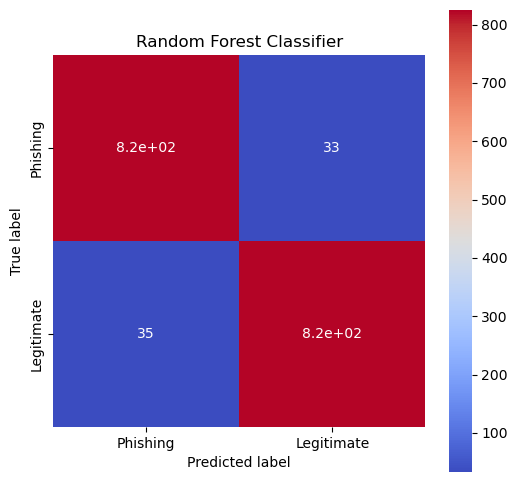

In [16]:
# Confusion matrices for both models
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# Neural network
y_test_pred_nn = model.predict(X_test)
y_test_pred_nn = np.round(y_test_pred_nn).flatten()
cm_nn = confusion_matrix(y_test, y_test_pred_nn)


plt.figure(figsize=(6, 6))
sns.heatmap(cm_nn, annot=True, square=True, cmap="coolwarm", xticklabels=['Phishing', 'Legitimate'], yticklabels=['Phishing', 'Legitimate'])
plt.title("Feedforward Neural Network")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Random forest
y_test_pred_rf = rf_classifier.predict(X_test)
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, square=True, cmap="coolwarm", xticklabels=['Phishing', 'Legitimate'], yticklabels=['Phishing', 'Legitimate'])
plt.title("Random Forest Classifier")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_estimators_range = range(1, 101)
rf_accuracies = []

for n_estimators in n_estimators_range:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_val_pred = rf_classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    rf_accuracies.append(accuracy)

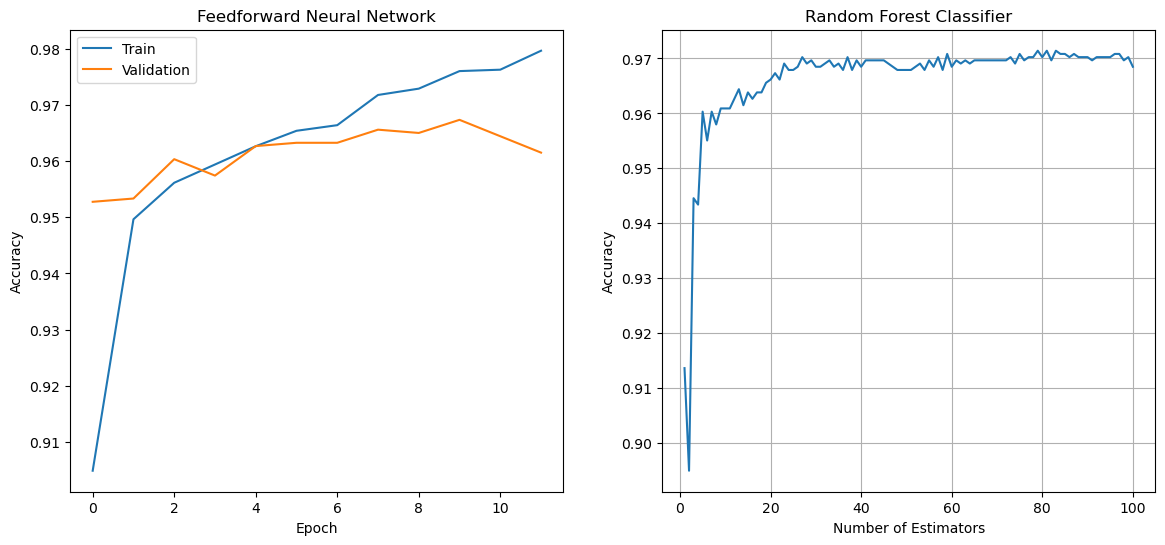

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Neural network plot
ax1.plot(history.history['accuracy'], label='Train')
ax1.plot(history.history['val_accuracy'], label='Validation')
ax1.set_title('Feedforward Neural Network')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend()

# Random forest plot
ax2.plot(n_estimators_range, rf_accuracies)
ax2.set_title('Random Forest Classifier')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Number of Estimators')
ax2.grid()

plt.show()

In [24]:
# Splitting the dataset into train, validation, and test sets
from sklearn.model_selection import train_test_split

X = df[feature_columns]
y = df['status']

# First, split into train and (validation + test) sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Then, split the (validation + test) set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


In [25]:
# Training the feedforward neural network
model = Sequential([
    # Input layer
    Dense(256, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    # Hidden layers
    Dense(128),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    Dense(64),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

# Training the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = rf_classifier.predict(X_val)

# Calculate and print the accuracy score, classification report, and confusion matrix
print("Accuracy Score:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Epoch 1/50
126/126 [==============================] - 1s 4ms/step - loss: 0.2437 - accuracy: 0.9035 - val_loss: 0.1545 - val_accuracy: 0.9457
Epoch 2/50
126/126 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 0.9463 - val_loss: 0.1338 - val_accuracy: 0.9592
Epoch 3/50
126/126 [==============================] - 0s 3ms/step - loss: 0.1253 - accuracy: 0.9556 - val_loss: 0.1344 - val_accuracy: 0.9592
Epoch 4/50
126/126 [==============================] - 0s 3ms/step - loss: 0.1134 - accuracy: 0.9589 - val_loss: 0.1237 - val_accuracy: 0.9592
Epoch 5/50
126/126 [==============================] - 0s 3ms/step - loss: 0.1051 - accuracy: 0.9628 - val_loss: 0.1226 - val_accuracy: 0.9609
Epoch 6/50
126/126 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.9648 - val_loss: 0.1366 - val_accuracy: 0.9557
Epoch 7/50
126/126 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9666 - val_loss: 0.1310 - val_accuracy: 0.9580
Epoch 

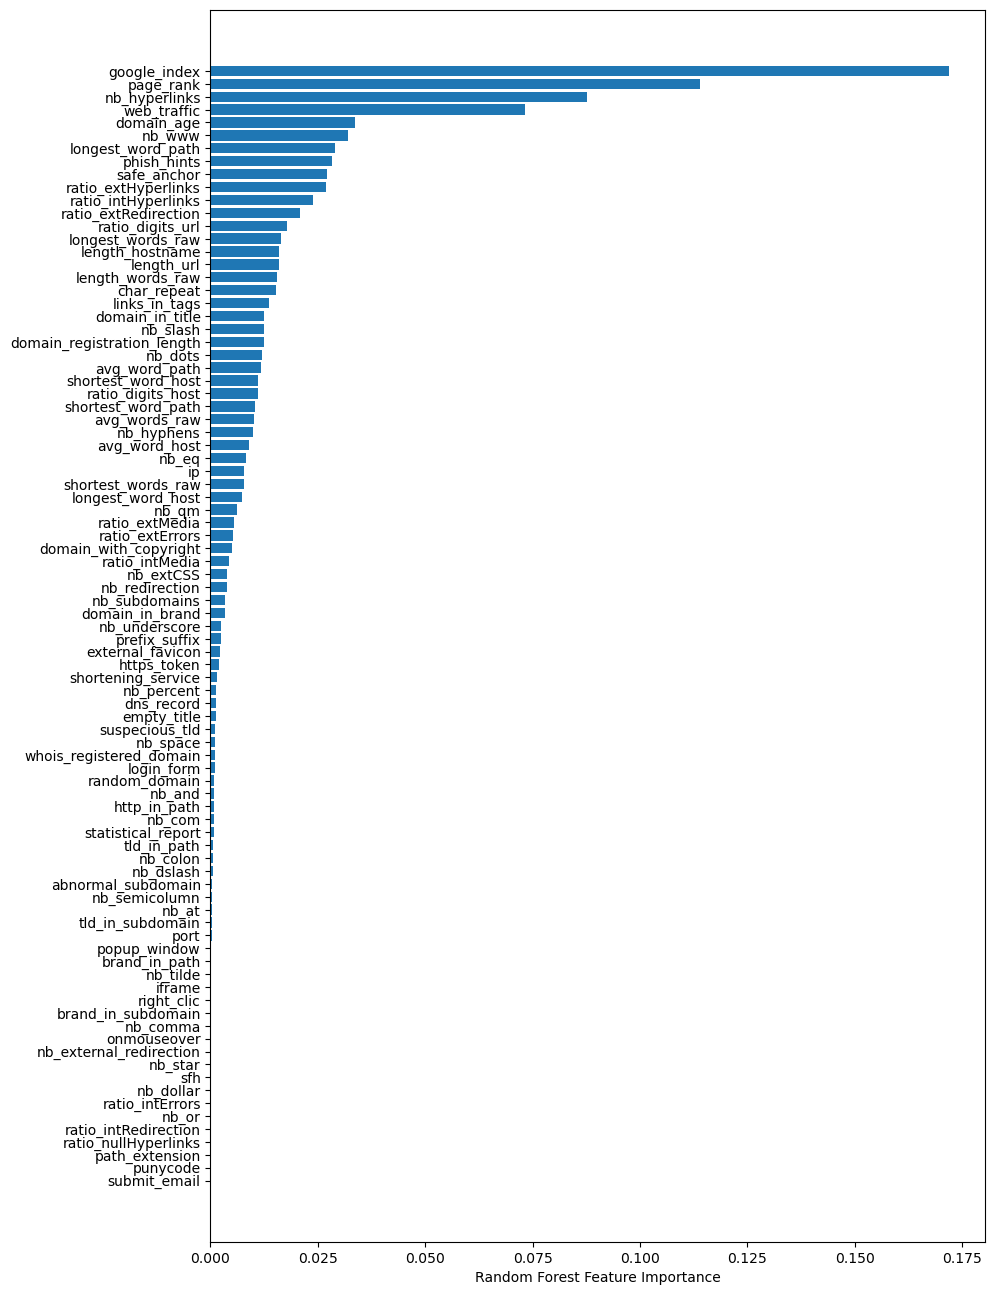

In [30]:
# Feature importance for the random forest classifier
importances = rf_classifier.feature_importances_
sorted_idx = importances.argsort()

# Increase the figure size
plt.figure(figsize=(10, 16))

plt.barh(range(X.shape[1]), importances[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()